In [1]:
!pip install simpy

In [2]:
from sympy import roots
from sympy.abc import x, b, u, s, v, t, D
from sympy.stats import P, E, variance, Die, Normal
from sympy import simplify
from sympy import *
from sympy import I, oo, erf
from sympy import exp, I, pi

In [ ]:
expr = (-D*(-((x+1)/(1-x))**((2*u)/s**2-1)*(1-erf(ln((x+1)/(1-x))/(sqrt(2)*s*sqrt(t))+(sqrt(t)*(u/s-s/2))/sqrt(2)))+erf(ln((x+1)/(1-x))/(sqrt(2)*s*sqrt(t))-(sqrt(t)*(u/s-s/2))/sqrt(2))+1)+D*(1-x)*(-(((2*u)/s**2-1)*(1-x)*((x+1)/(1-x))**((2*u)/s**2-1)*((x+1)/(1-x)**2+1/(1-x))*(1-erf(ln((x+1)/(1-x))/(sqrt(2)*s*sqrt(t))+(sqrt(t)*(u/s-s/2))/sqrt(2))))/(x+1)+(sqrt(2)*(1-x)*((x+1)/(1-x))**((2*u)/s**2-1)*((x+1)/(1-x)**2+1/(1-x))*exp(-(ln((x+1)/(1-x))/(sqrt(2)*s*sqrt(t))+(sqrt(t)*(u/s-s/2))/sqrt(2))**2))/(sqrt(pi)*s*sqrt(t)*(x+1))+(sqrt(2)*(1-x)*((x+1)/(1-x)**2+1/(1-x))*exp(-(ln((x+1)/(1-x))/(sqrt(2)*s*sqrt(t))-(sqrt(t)*(u/s-s/2))/sqrt(2))**2))/(sqrt(pi)*s*sqrt(t)*(x+1)))+D*exp(2*t*u)*(1-x)*((2*(u/s**2+1/2)*(1-x)*((x+1)/(1-x))**(2*(u/s**2+1/2))*((x+1)/(1-x)**2+1/(1-x))*(1-erf((ln((x+1)/(1-x))+s**2*t*(u/s**2+1/2))/(sqrt(2)*s*sqrt(t)))))/(x+1)-(sqrt(2)*(1-x)*((x+1)/(1-x))**(2*(u/s**2+1/2))*((x+1)/(1-x)**2+1/(1-x))*exp(-(ln((x+1)/(1-x))+s**2*t*(u/s**2+1/2))**2/(2*s**2*t)))/(sqrt(pi)*s*sqrt(t)*(x+1))-(sqrt(2)*(1-x)*((x+1)/(1-x)**2+1/(1-x))*exp(-(ln((x+1)/(1-x))-s**2*t*(u/s**2+1/2))**2/(2*s**2*t)))/(sqrt(pi)*s*sqrt(t)*(x+1)))+D*(2*exp(2*t*u)-exp(2*t*u)*(((x+1)/(1-x))**(2*(u/s**2+1/2))*(1-erf((ln((x+1)/(1-x))+s**2*t*(u/s**2+1/2))/(sqrt(2)*s*sqrt(t))))-erf((ln((x+1)/(1-x))-s**2*t*(u/s**2+1/2))/(sqrt(2)*s*sqrt(t)))+1)))/4-(D*b*(exp(t*(-v+u/2-s**2/8))-1))/(-v+u/2-s**2/8)-D*exp(t*(u/2-s**2/8))

#Анализ μ и σ на истории дневных торгов монеты Ethereum


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import math as m
import random as r
import numpy.matlib
import json

from scipy.stats import norm
from scipy.stats import uniform
from datetime import datetime

In [4]:
df = pd.read_csv('eth_daily.csv')
df

,Unnamed: 0,datetime,close
0,0,2019-01-01,144.640640
1,1,2019-01-02,153.472537
2,2,2019-01-03,147.984158
3,3,2019-01-04,152.529237
4,4,2019-01-05,152.948834
...,...,...,...
1937,1937,2024-04-21,3147.850701
1938,1938,2024-04-22,3200.340963
1939,1939,2024-04-23,3219.437841
1940,1940,2024-04-24,3140.349540


In [5]:
#Преобразовали цены закрытия в доходности
returns_df = df["close"].pct_change().dropna()
returns_df

1       0.061061
2      -0.035761
3       0.030713
4       0.002751
5       0.019585
          ...   
1937   -0.002530
1938    0.016675
1939    0.005967
1940   -0.024566
1941    0.004887
Name: close, Length: 1941, dtype: float64

In [6]:
window_size = 180
rolling_mean_values = returns_df.rolling(window=window_size).mean().values
rolling_mean_values = rolling_mean_values[179:]

rolling_var_values = returns_df.rolling(window=window_size).var().values
rolling_var_values = rolling_var_values[179:]

rolling_var_values = np.array([np.sqrt(365*element) for element in rolling_var_values])

rolling_mean_values = np.array([element * 365 for element in rolling_mean_values])

rolling_mean_values = rolling_mean_values - np.square(rolling_var_values)/2


print(rolling_mean_values)

print(rolling_var_values)

[1.41041023 1.31823825 1.37433365 ... 1.17429138 1.1508434  1.16453063]
[0.89707075 0.89356772 0.89190221 ... 0.60536508 0.6062252  0.60617637]


In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Создание объекта для построения гистограммы
fig = make_subplots(rows=1, cols=1)

# Добавление гистограммы
fig.add_trace(
    go.Histogram(x=rolling_mean_values, nbinsx=30),
    row=1, col=1
)

# Настройка макета и подписей
fig.update_layout(
    title="Histogram of Rolling Mean Values",
    xaxis_title="Rolling Mean Value",
    yaxis_title="Frequency"
)

# Отображение графика
fig.show()



In [8]:
print(np.mean(rolling_mean_values))

0.5800316140041699


In [9]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Создание объекта для построения гистограммы
fig = make_subplots(rows=1, cols=1)

# Добавление гистограммы
fig.add_trace(
    go.Histogram(x=rolling_var_values, nbinsx=30, marker_color='#EB89B5'),
    row=1, col=1
)

# Настройка макета и подписей
fig.update_layout(
    title="Histogram of Rolling Variance Values",
    xaxis_title="Rolling Variance Value",
    yaxis_title="Frequency"
)

# Отображение графика
fig.show()


In [10]:
print(np.mean(rolling_var_values))

0.8378971613306935


#Grid Search


In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import time

expr1 = (D*(1-x)*(-(((x+1)/(1-x))**((2*u)/s**2-1)*(1-erf(ln((x+1)/(1-x))/(sqrt(2)*s*sqrt(t))+(sqrt(t)*(u/s-s/2))/sqrt(2))))/2-(1-erf(ln((x+1)/(1-x))/(sqrt(2)*s*sqrt(t))-(sqrt(t)*(u/s-s/2))/sqrt(2)))/2+1))/2-(D*(1-x)*(exp(2*t*u)-(exp(2*t*u)*(((x+1)/(1-x))**(2*(u/s**2+1/2))*(1-erf((ln((x+1)/(1-x))+s**2*t*(u/s**2+1/2))/(sqrt(2)*s*sqrt(t))))-erf((ln((x+1)/(1-x))-s**2*t*(u/s**2+1/2))/(sqrt(2)*s*sqrt(t)))+1))/2))/2+(D*b*(exp(t*(-v+u/2-s**2/8))-1)*(1-x))/(-v+u/2-s**2/8)+D*exp(t*(u/2-s**2/8))*(1-x)

# Пример функции, которую мы хотим максимизировать
def example_function(param_x, param_b, param_t, param_u, param_s):
    return expr1.subs([(x, param_x), (b, param_b), (t, param_t), (u, param_u), (s, param_s), (D, 1), (v, 0.05)]).evalf()

start_time = time.time()
print(example_function(0.1, 0.3, 0.3, 0.1, 4.6))
end_time = time.time()

elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

# Определение сетки параметров для поиска
param_grid = {
    'param_x': np.linspace(0.0, 1.0, 10),
    'param_b': np.linspace(0.1, 0.3, 3),
    'param_t': np.linspace(0.3, 1.0, 3),
    'param_u': np.linspace(-1, 2, 25),
    'param_s': np.linspace(0.5, 1.0, 15)
}

# Перебор всех комбинаций параметров
best_params = None
best_score = 0.0

columns = ['x', 'b', 'Score']
df1 = pd.DataFrame(columns=columns)

for param_x in param_grid['param_x']:
    for param_b in param_grid['param_b']:
        for param_t in param_grid['param_t']:
            for param_u in param_grid['param_u']:
                for param_s in param_grid['param_s']:
                    score = example_function(param_x, param_b, param_t, param_u, param_s)
                    if isinstance(score, Float) == False:
                        continue
                    df1.loc[len(df1)] = [param_x, param_b, score]
                    if score > best_score and score < 15:
                        best_score = score
                        best_params = {'param_x': param_x, 'param_b': param_b, 'param_t': param_t, 'param_u': param_u, 'param_s': param_s}

print("Best parameters:", best_params)
print("Best score:", best_score)


0.549444970927632
Elapsed time:  0.1268596649169922
Best parameters: {'param_x': 0.0, 'param_b': 0.3, 'param_t': 1.0, 'param_u': 2.0, 'param_s': 0.5}
Best score: 3.12645504359618


In [ ]:
df1

,x,b,Score
0,0.000000,0.0,1.00000000000000
1,0.000000,0.0,1.00000000000000
2,0.000000,0.0,1.00000000000000
3,0.000000,0.0,1.00000000000000
4,0.000000,0.0,1.00000000000000
...,...,...,...
11929,0.888889,1.0,0.218890517599258
11930,0.888889,1.0,0.218422107261862
11931,0.888889,1.0,0.219167618906311
11932,0.888889,1.0,0.218846227555821


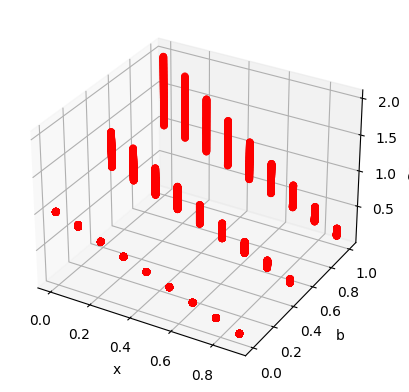

In [ ]:
# Создание трехмерного графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение данных из DataFrame
ax.scatter(df1['x'], df1['b'], df1['Score'], c='r', marker='o')

# Настройка меток осей
ax.set_xlabel('x')
ax.set_ylabel('b')
ax.set_zlabel('Score')

plt.show()